In [1]:
import sys, os
from numpy import array
from datetime import timedelta
import datetime

%load_ext autoreload
%autoreload 2

In [2]:
sys.path.append('/mnt/c/Users/homer/Dropbox/personal/journal/work-journal/')

In [3]:
import view
from view import get_nth_prev_month, get_month_range, calc_worked_time_in_date_range, str_to_timedelta,\
    TAGS, READING_GROUP_TAGS

In [13]:
STUDY_TAGS = READING_GROUP_TAGS + ['ucsd_class', 'ucsd_course', 'ucsd_talk']
STUDY_TAGS

['ucsd_dayanabbott-rg',
 'ucsd_planning-rg',
 'planning-rg',
 'ucsd_book-club',
 'ucsd_yu-jc',
 'ucsd_neurotheory-jc',
 'jotun-rg',
 'ucsd_tem-rg',
 'bishop-rg',
 'ucsd_hpc-rg',
 'ucsd_class',
 'ucsd_course',
 'ucsd_talk']

In [19]:
array(all_durs)[array(all_tags) == "ucsd_ta"].sum()

4.333333333333333

In [22]:
array([array(all_tags) == research_tag 
                            for research_tag in view.RESEARCH_TAGS]),\
array([array(all_tags) == research_tag 
                            for research_tag in view.RESEARCH_TAGS]).shape,\
len(view.RESEARCH_TAGS), len(all_tags)

(array([[ True, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False,  True, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False]]),
 (12, 9),
 12,
 9)

`logical_or.reduce` will do the OR operation across all the chosen category tags (e.g. research, study or ta) to check if there was an entry in `all_tags` in that category

In [16]:
np.logical_or.reduce(array([array(all_tags) == research_tag 
                            for research_tag in view.RESEARCH_TAGS]))

array([ True,  True, False, False, False, False, False, False, False])

(2019, 3)
(2019, 4)
(2019, 5)
(2019, 6)
(2019, 7)
(2019, 8)
(2019, 9)
(2019, 10)
(2019, 11)
(2019, 12)
(2020, 1)
(2020, 2)
(2020, 3)
(2020, 4)
(2020, 5)
(2020, 6)
(2020, 7)
(2020, 8)
(2020, 9)
(2020, 10)
(2020, 11)
(2020, 12)
(2021, 1)
(2021, 2)
(2021, 3)
(2021, 4)
(2021, 5)
(2021, 6)
(2021, 7)
(2021, 8)
(2021, 9)
(2021, 10)
(2021, 11)
(2021, 12)


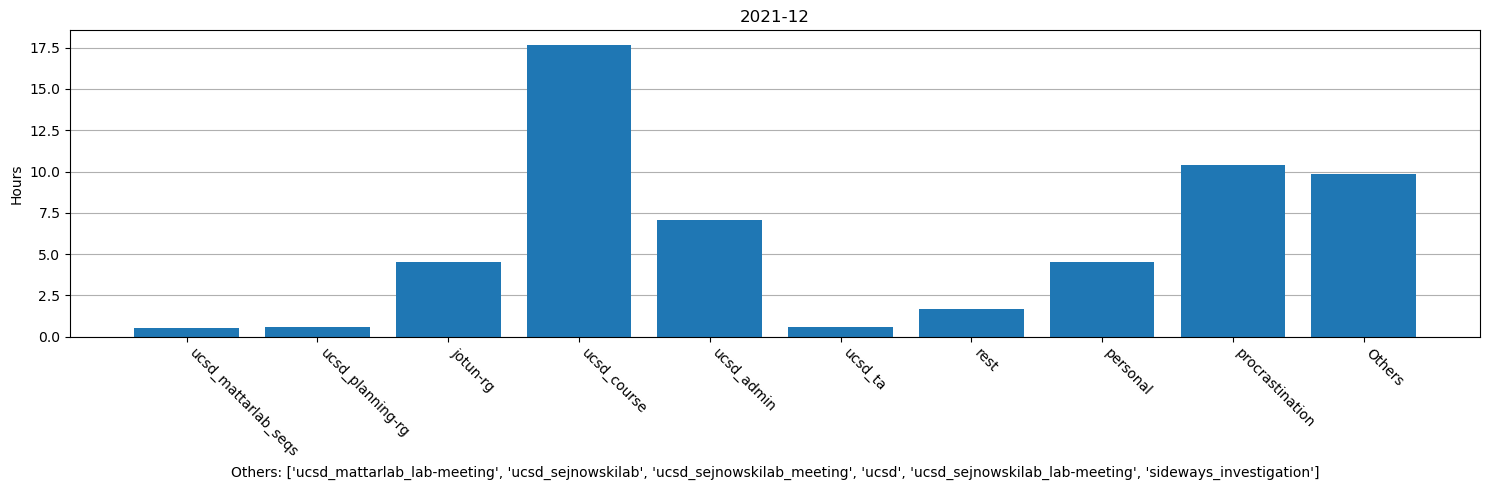

(2022, 1)


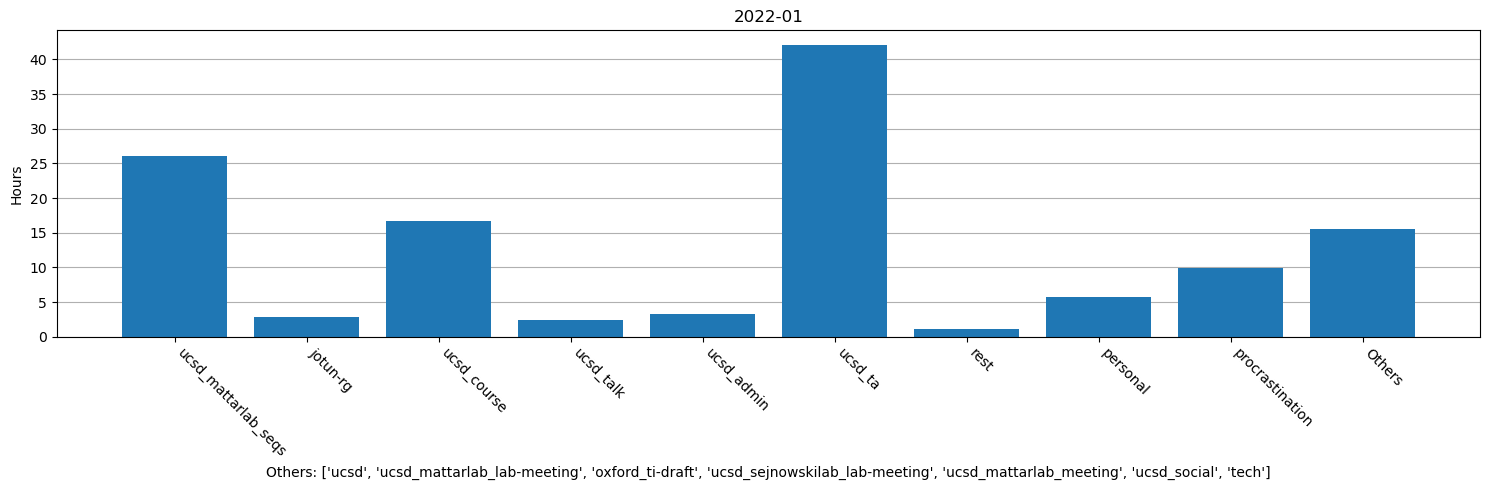

(2022, 2)


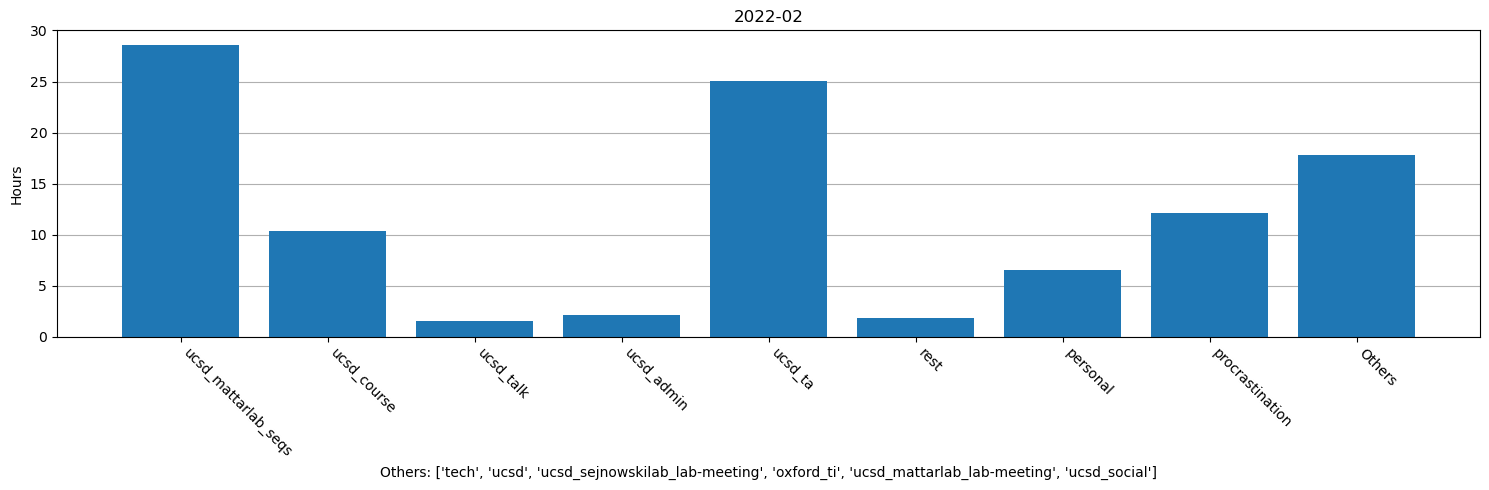

(2022, 3)


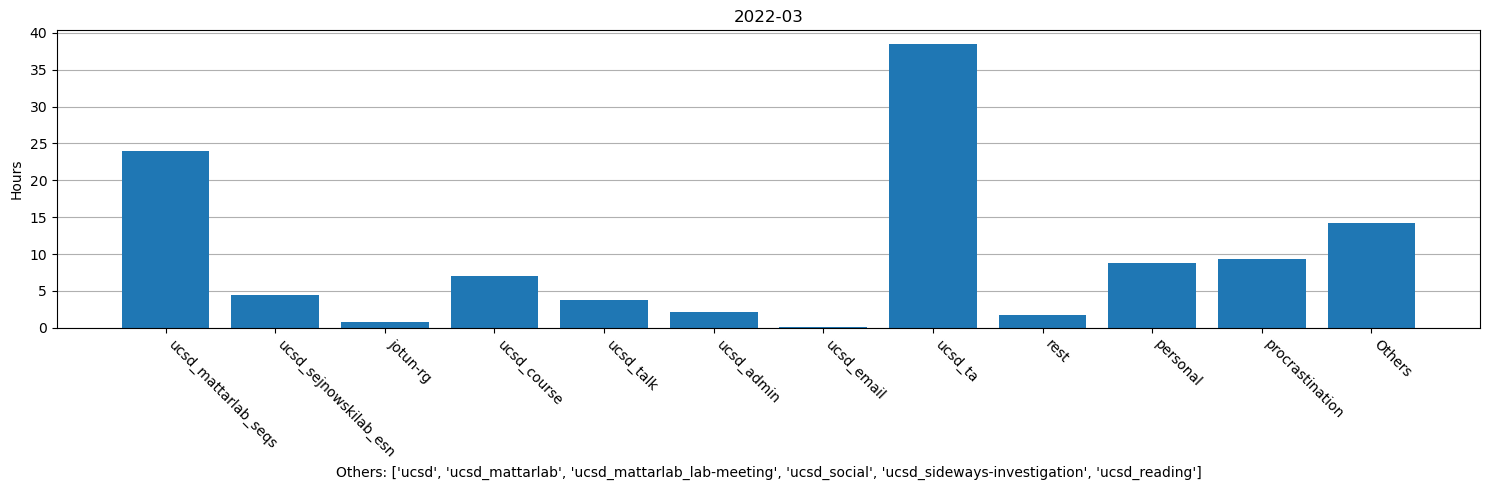

(2022, 4)


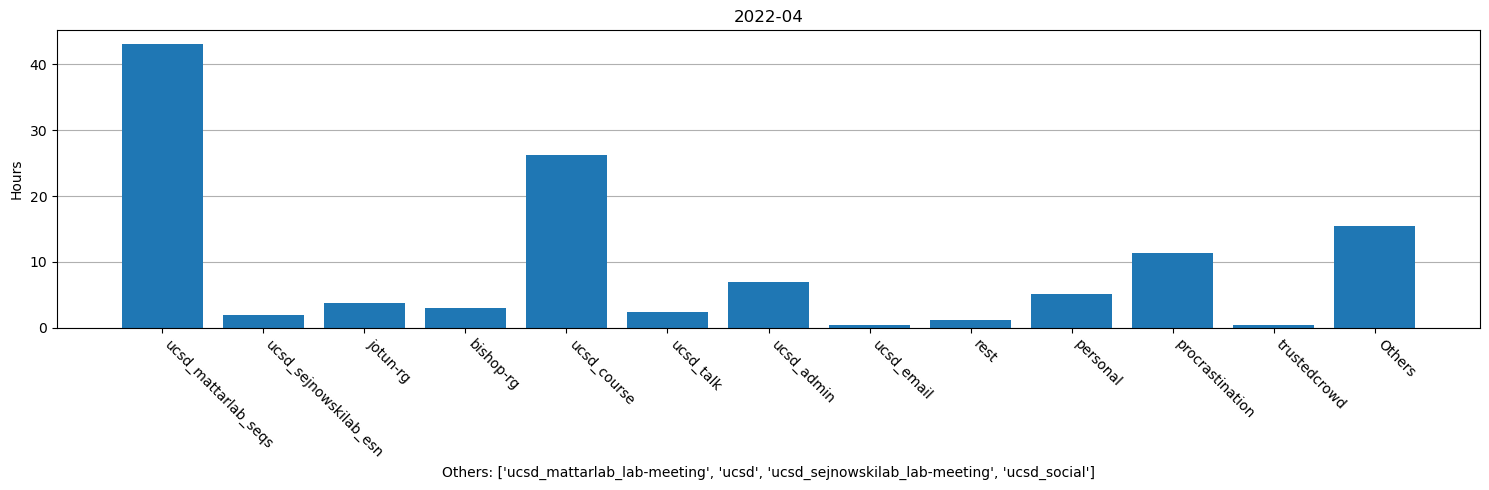

(2022, 5)


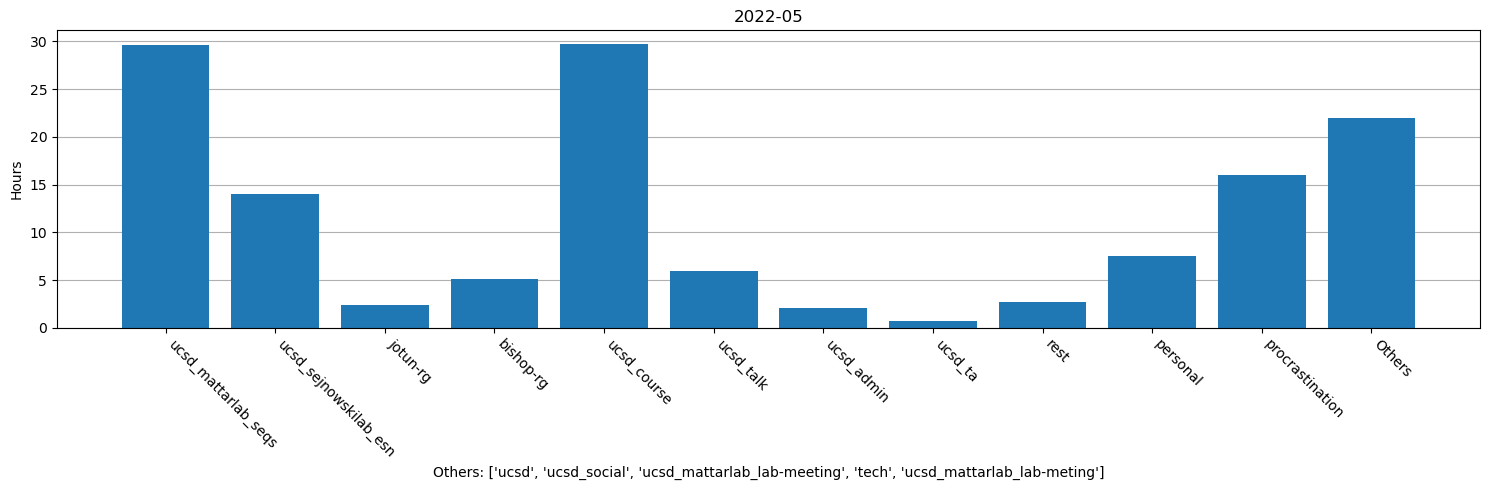

(2022, 6)


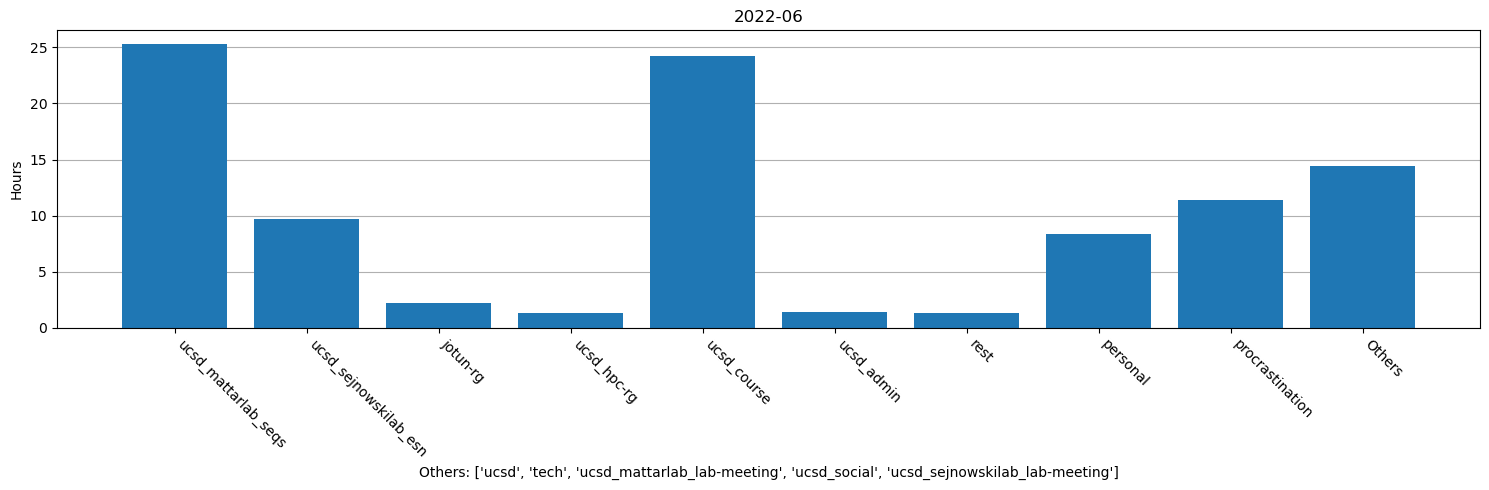

(2022, 7)


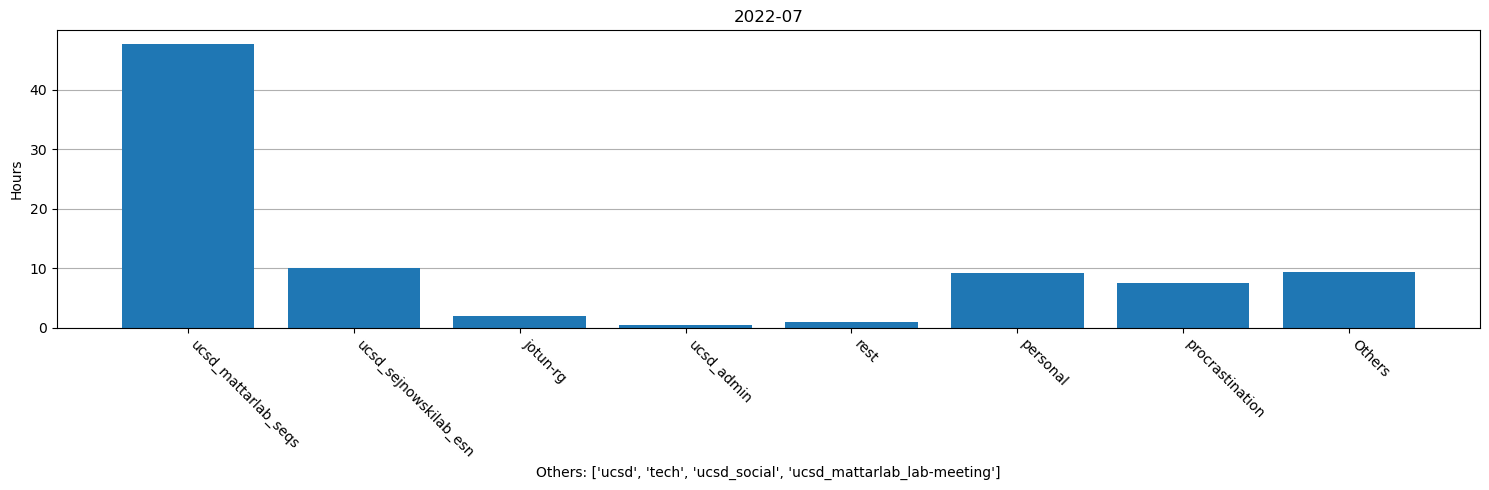

(2022, 8)


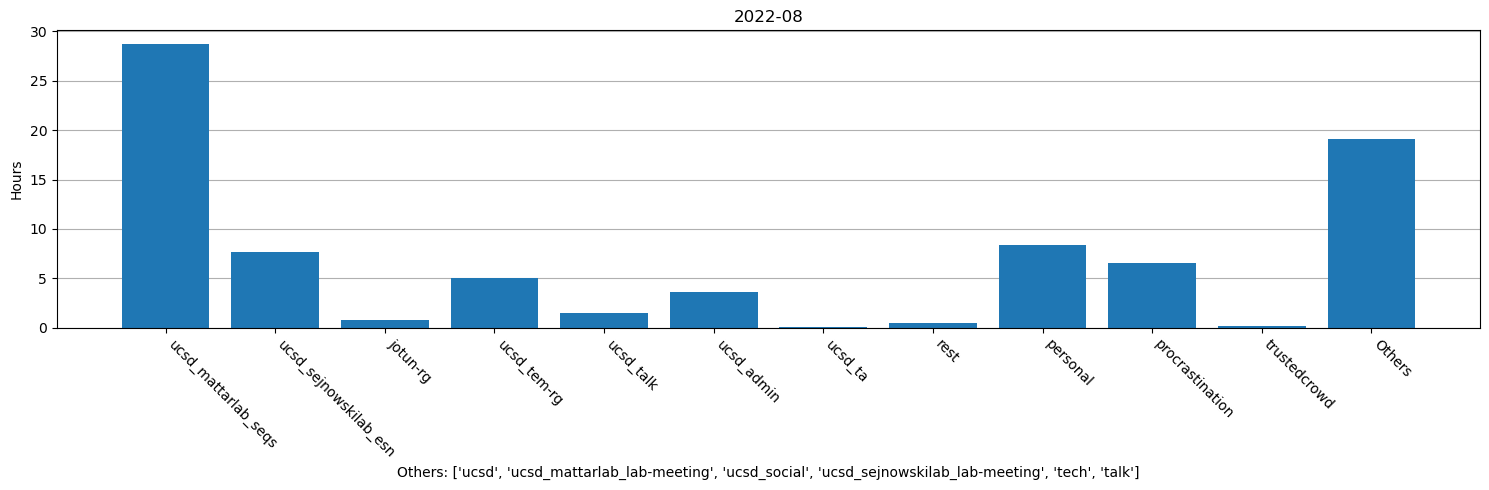

(2022, 9)


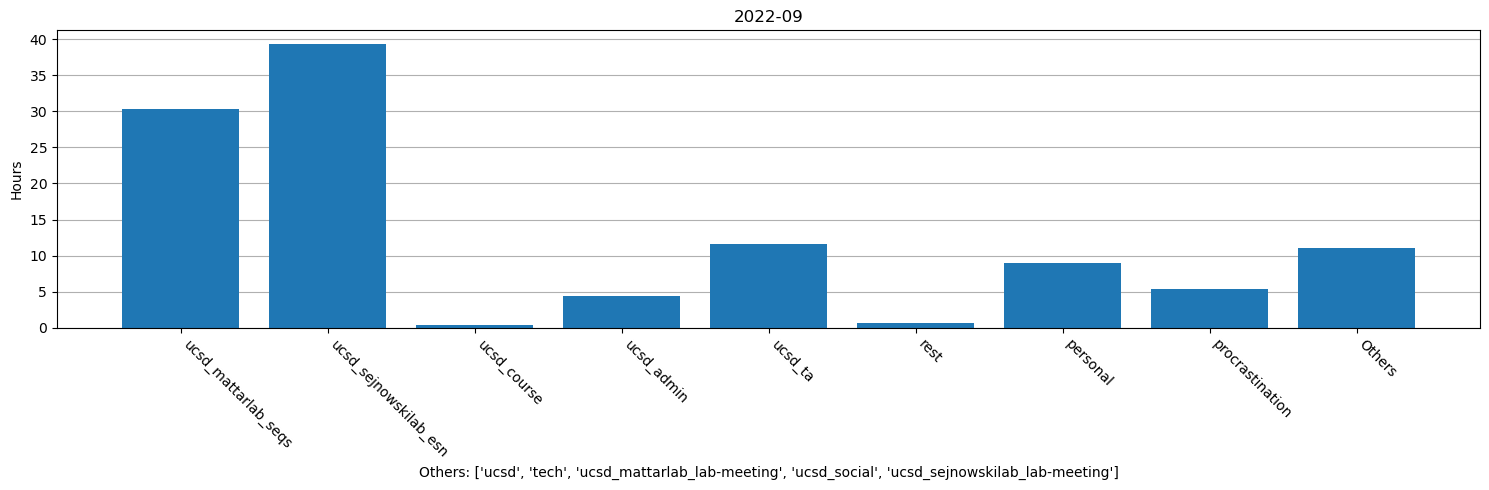

(2022, 10)


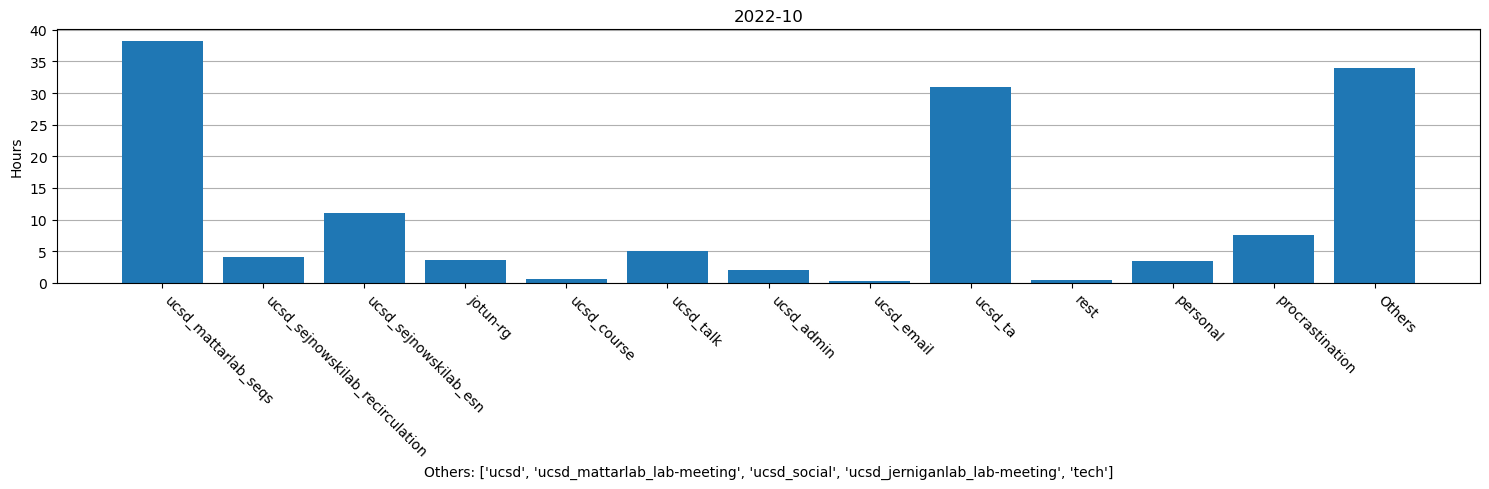

(2022, 11)


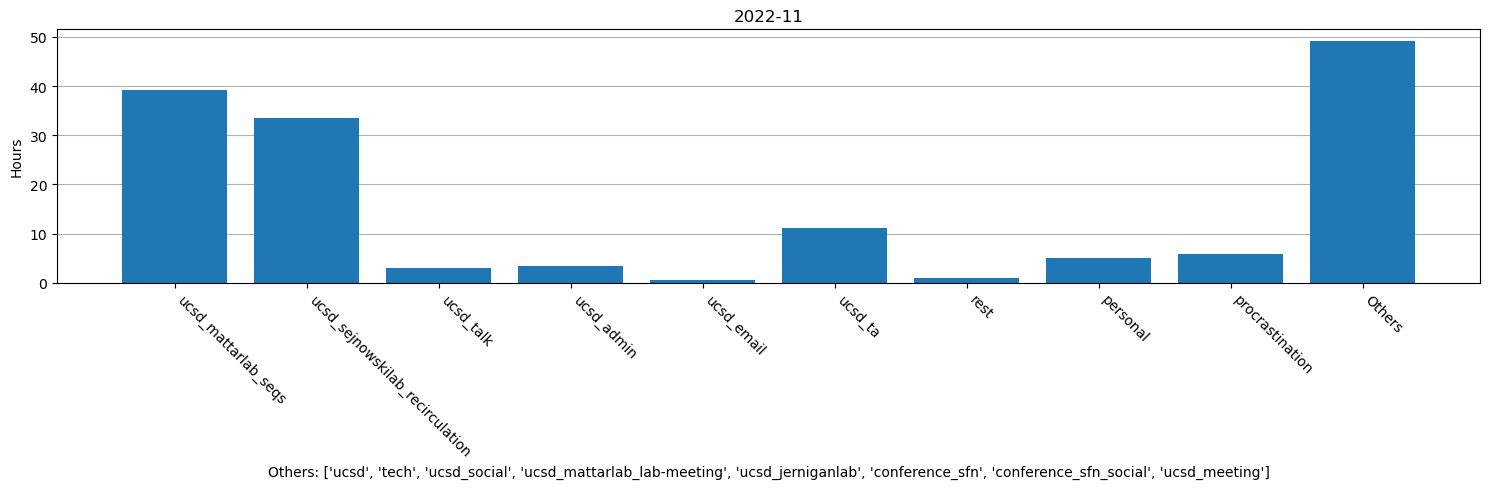

(2022, 12)


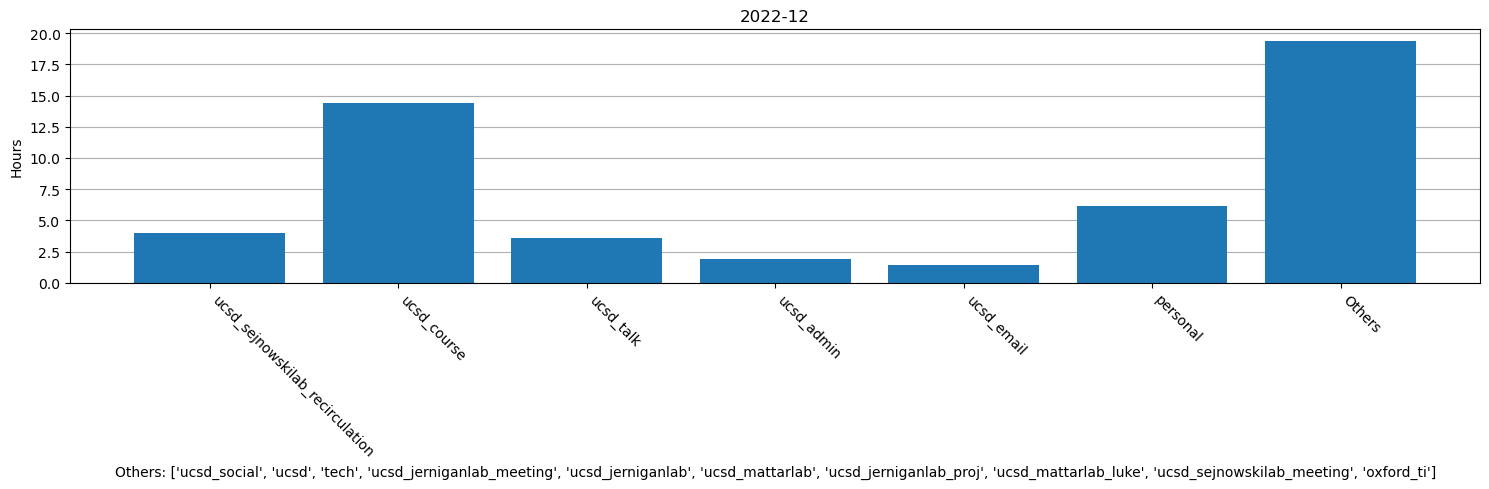

(2023, 1)


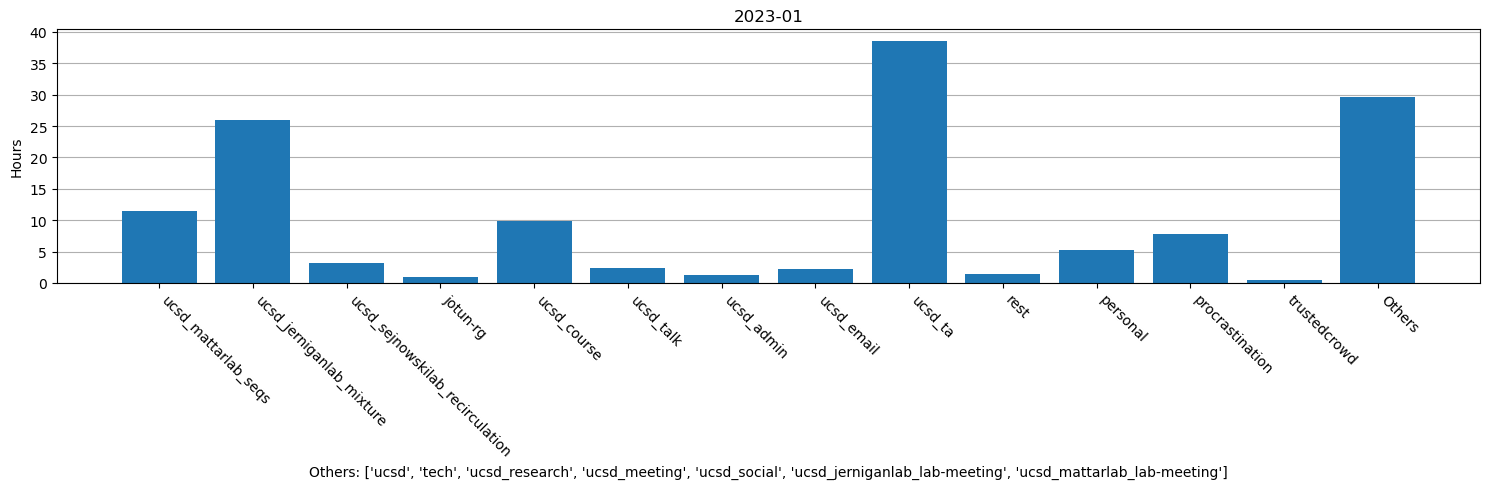

(2023, 2)


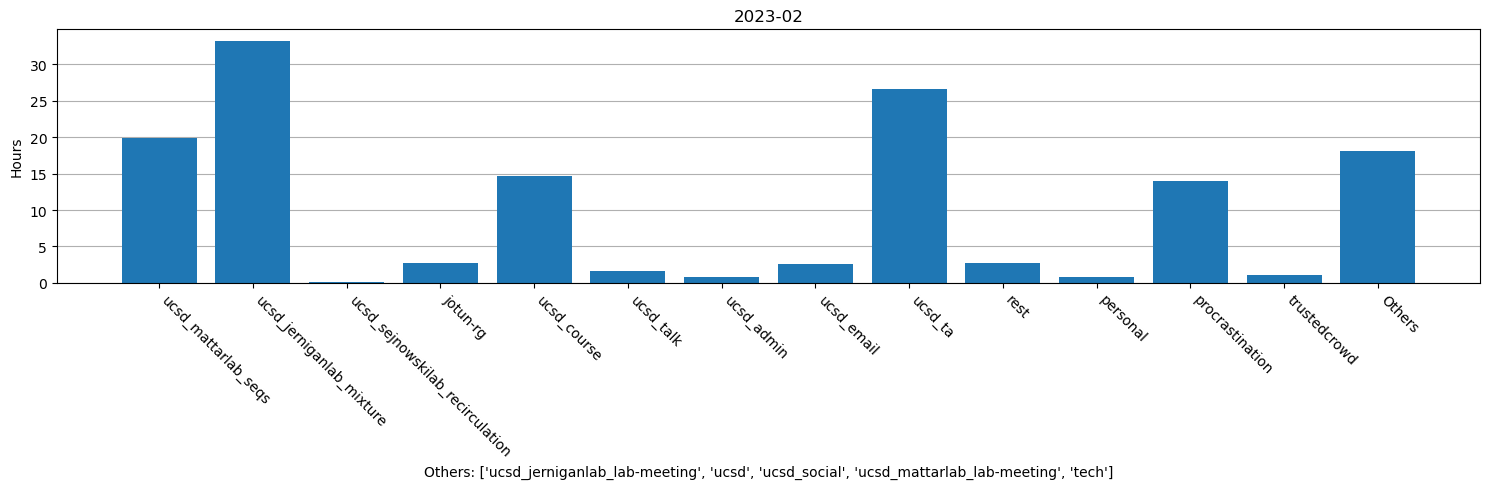

(2023, 3)


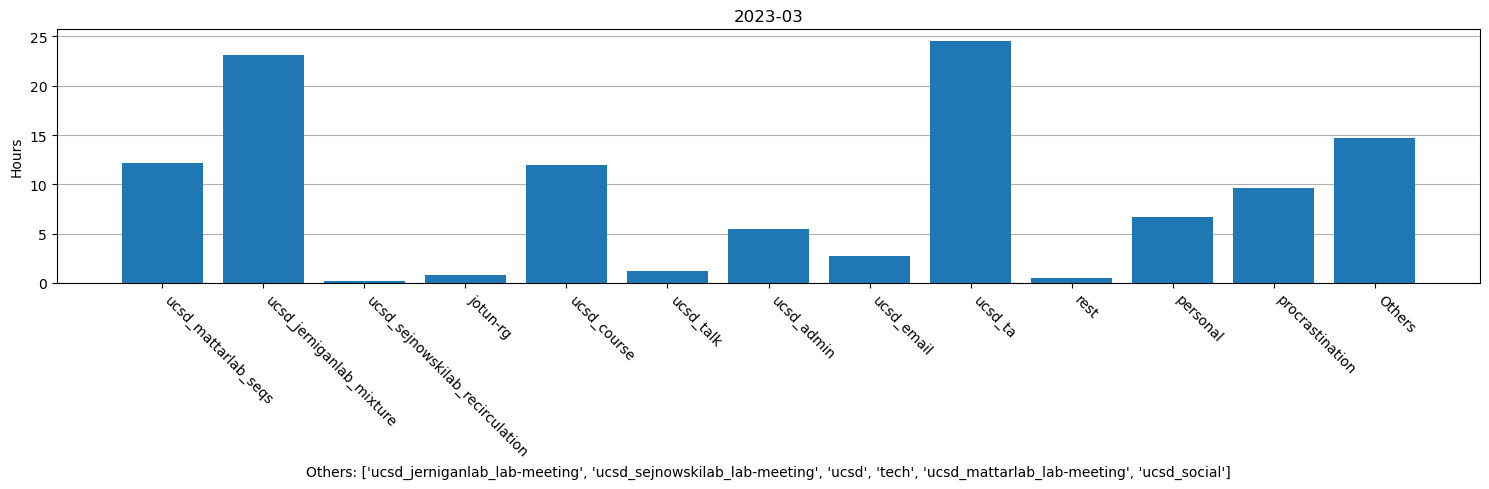

(2023, 4)


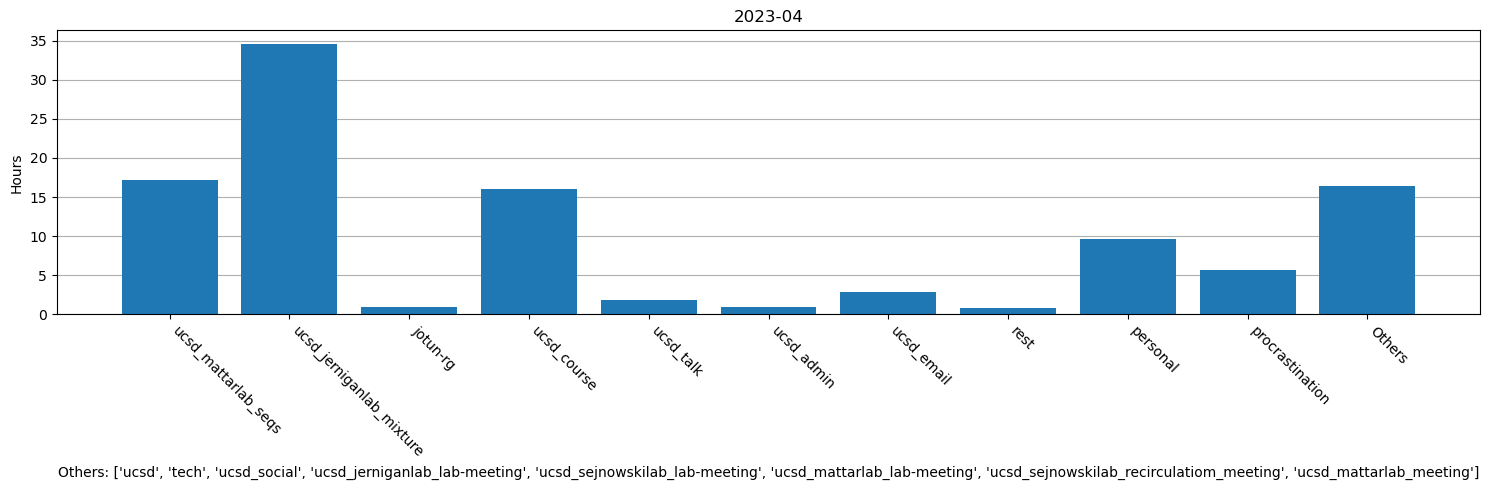

(2023, 5)


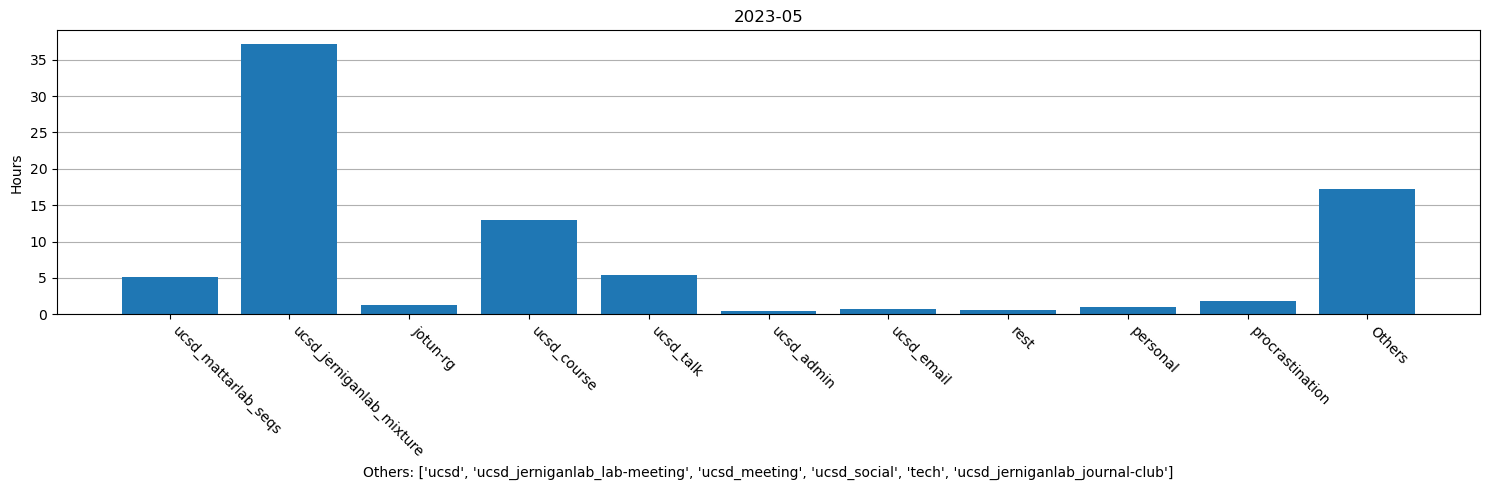

(2023, 6)


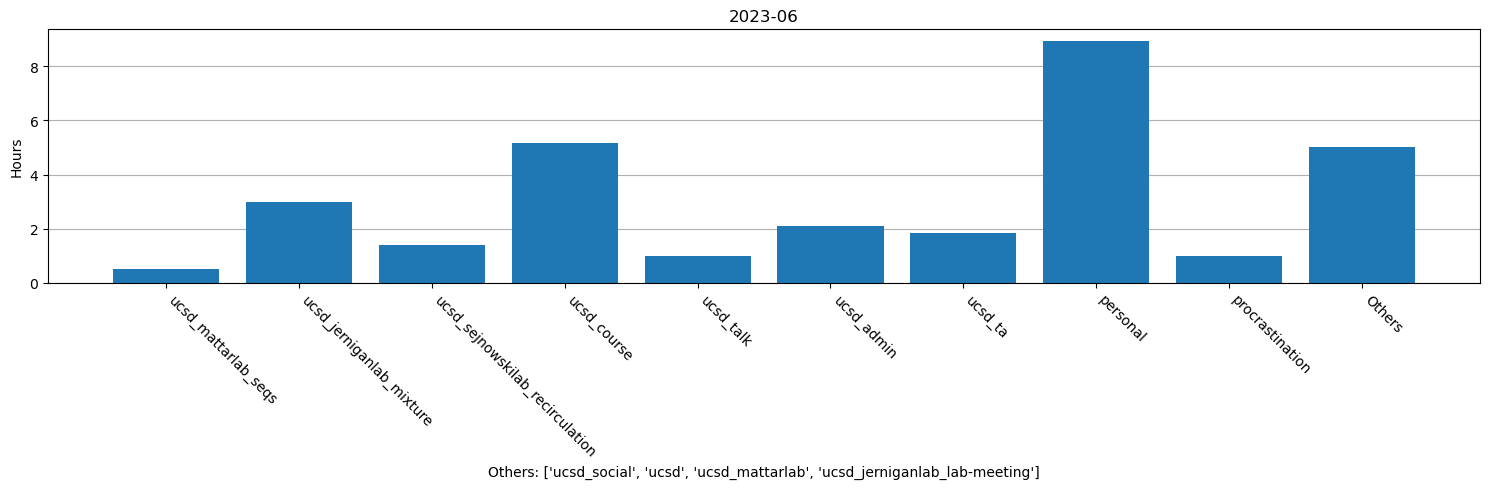

(2023, 7)


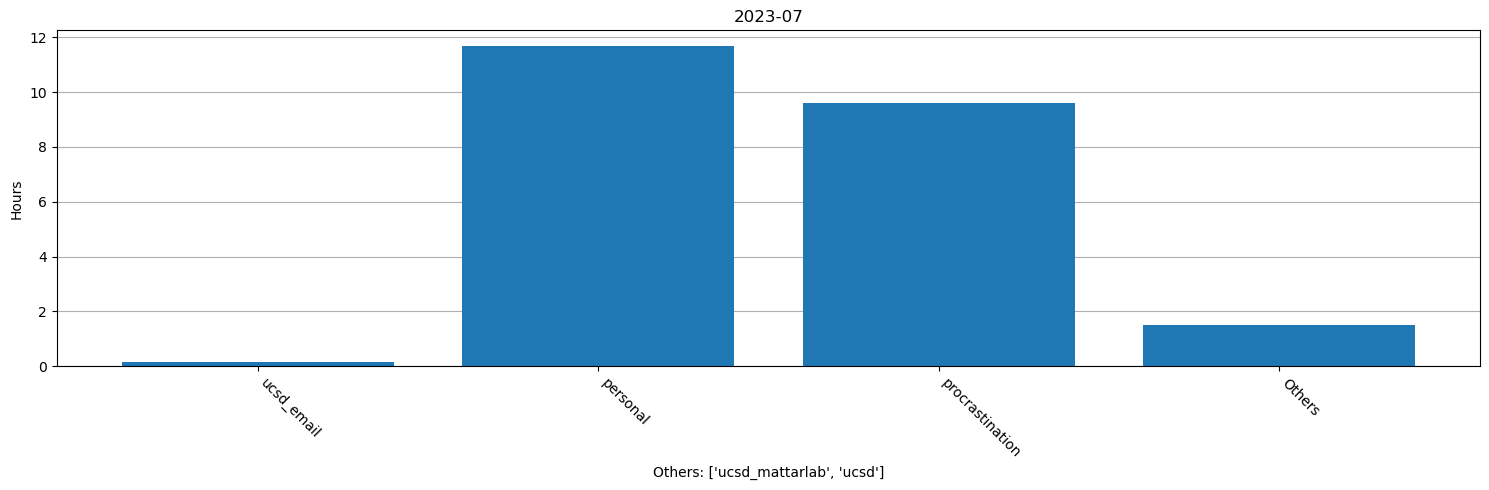

(2023, 8)


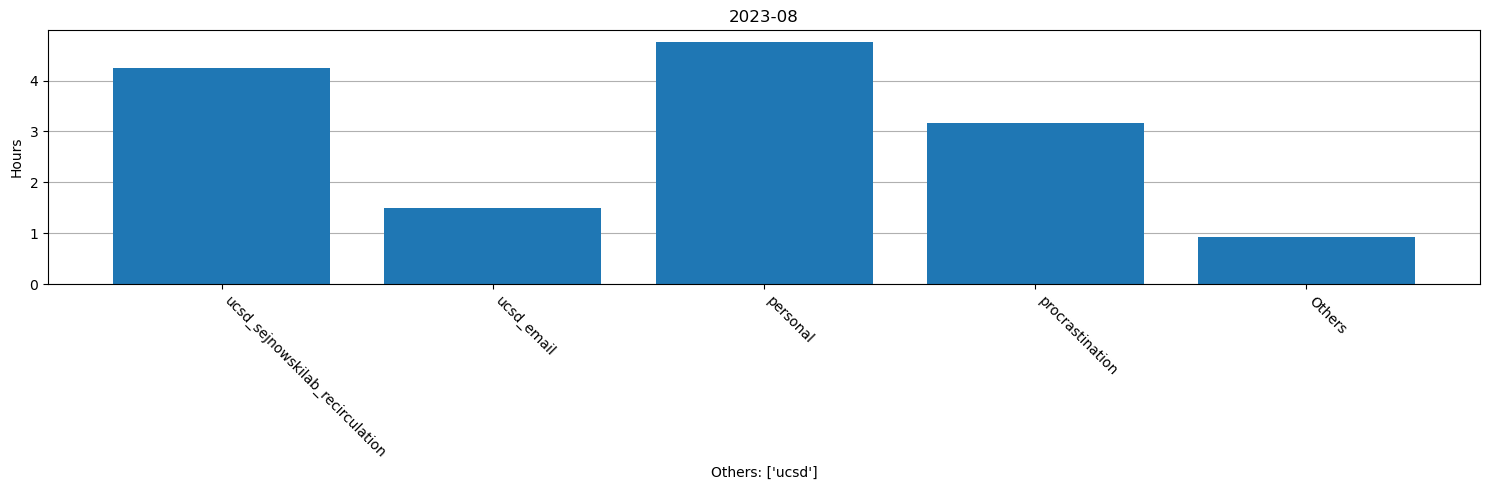

(2023, 9)


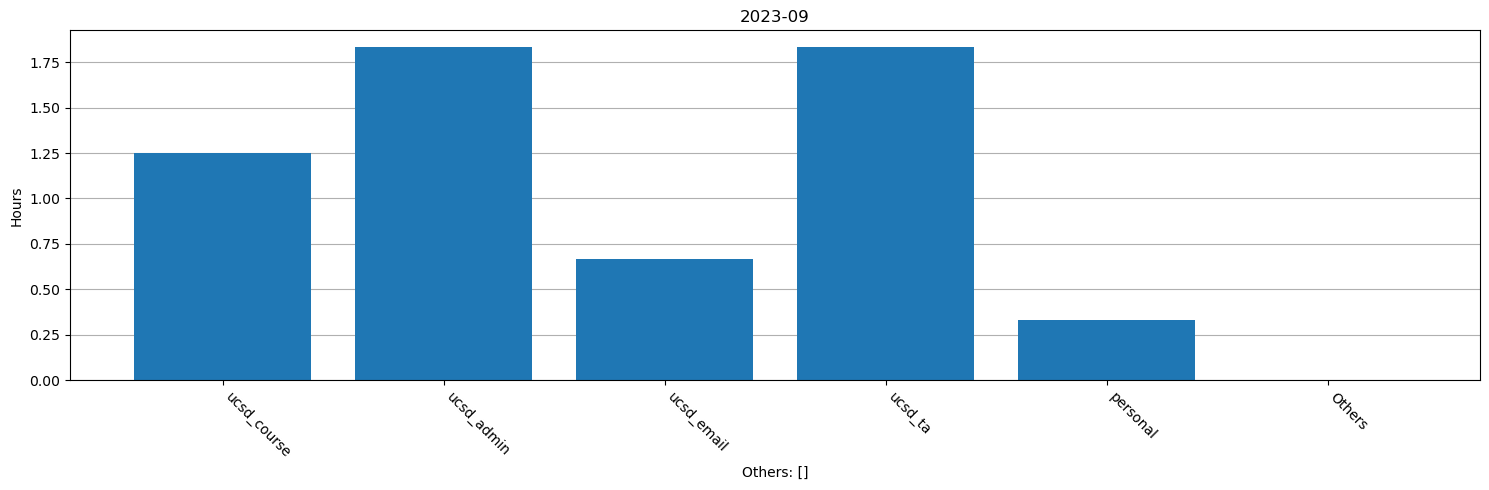

(2023, 10)


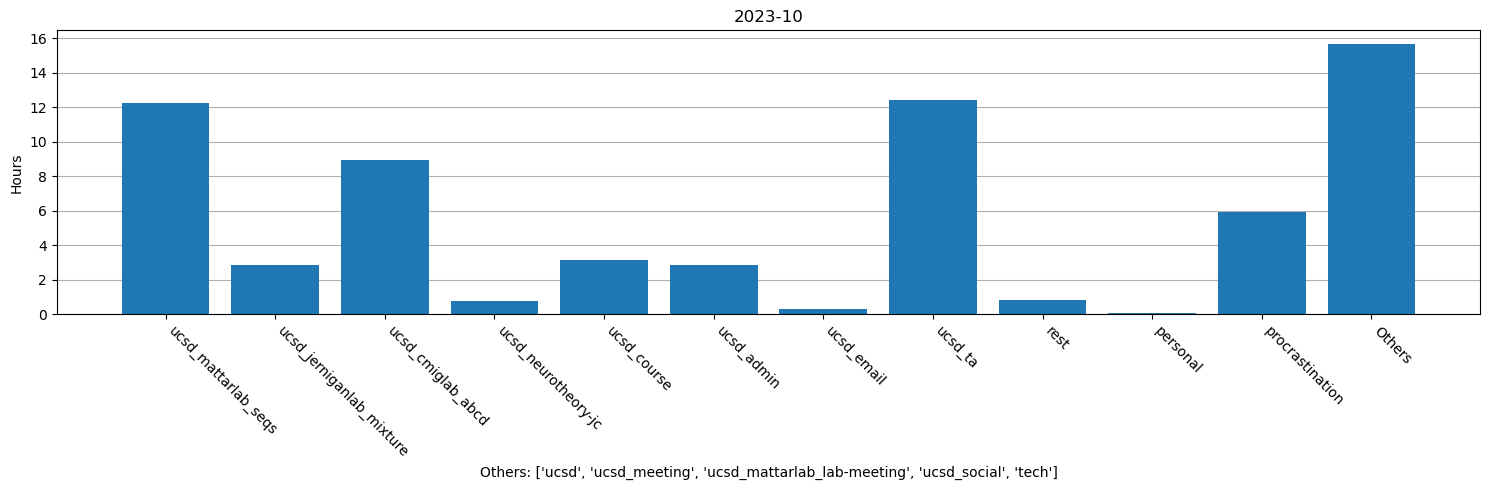

(2023, 11)


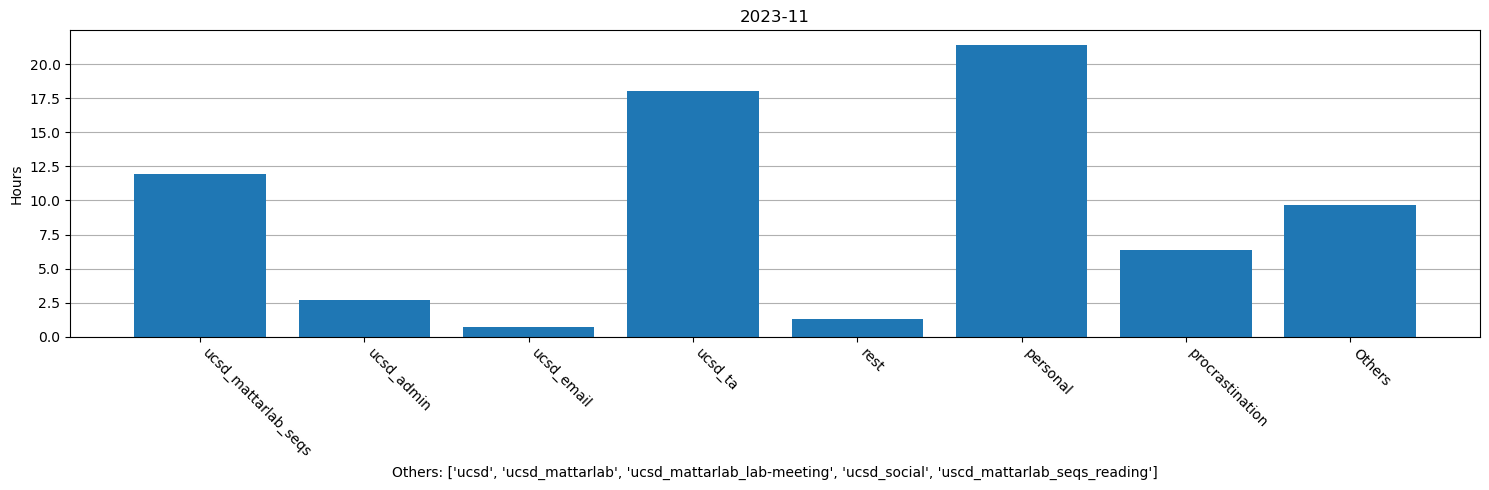

(2023, 12)


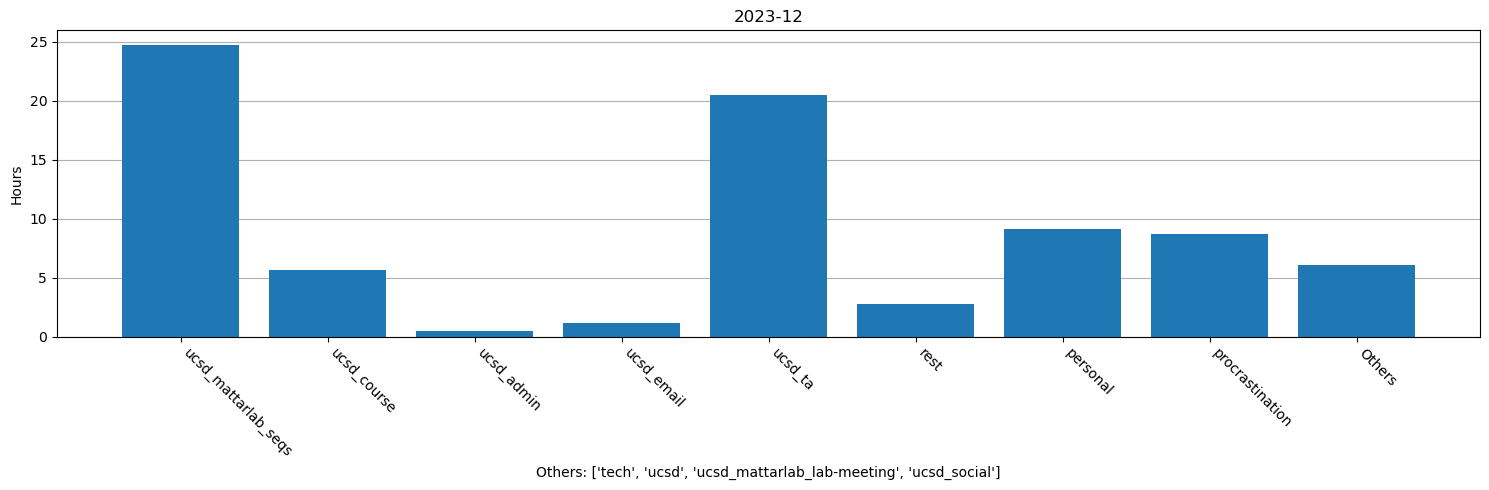

(2024, 1)


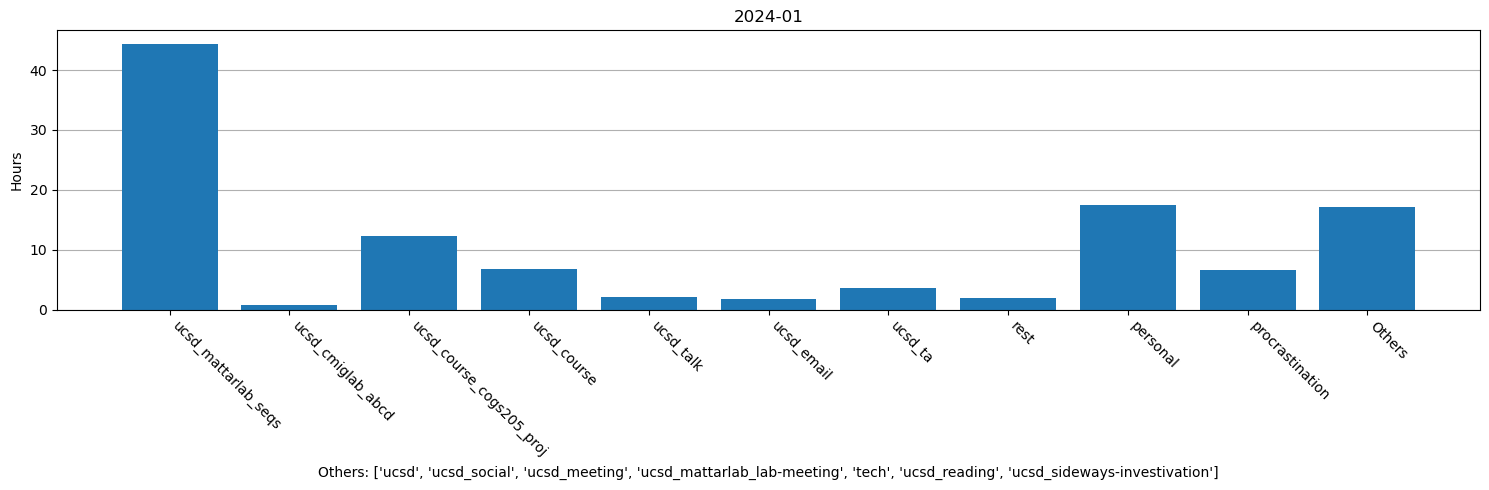

(2024, 2)


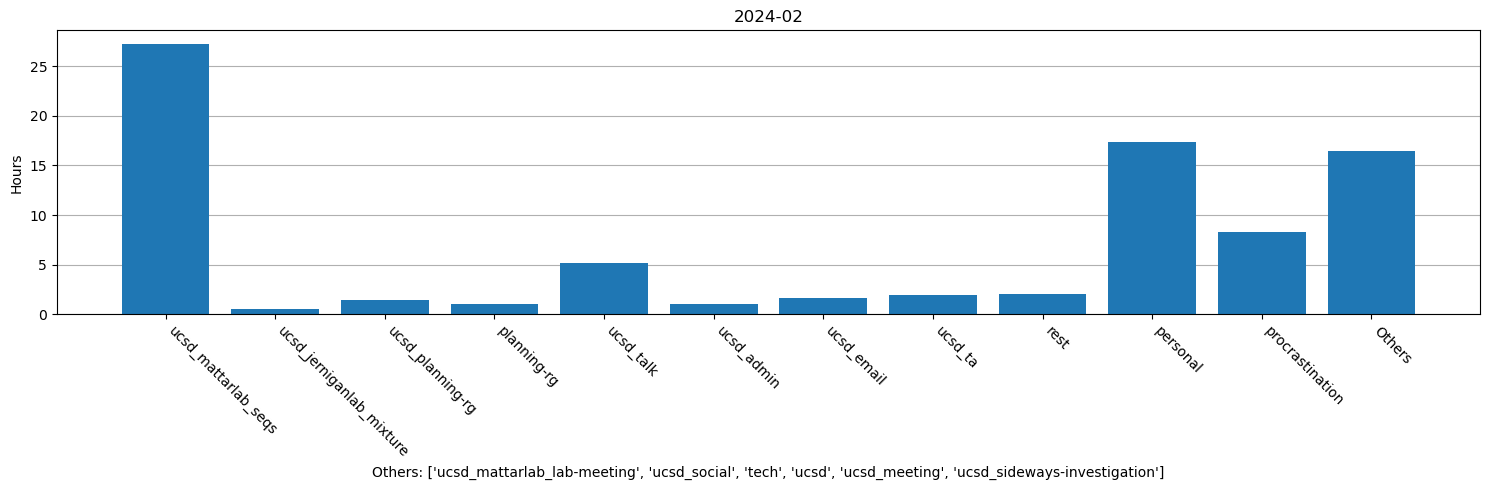

(2024, 3)


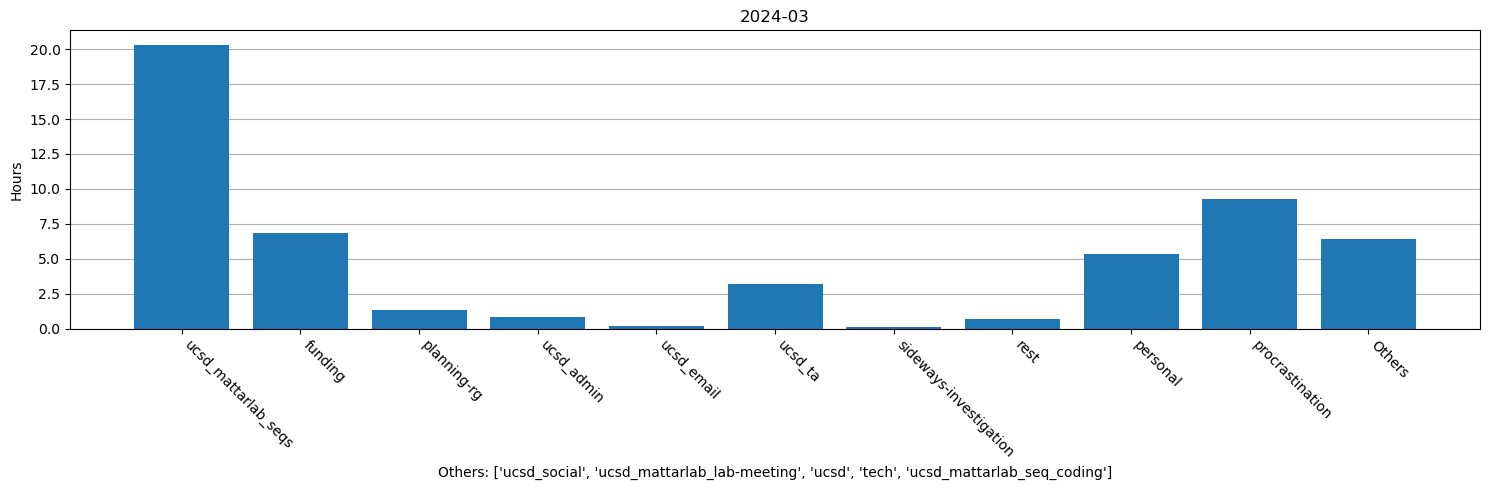

(2024, 4)


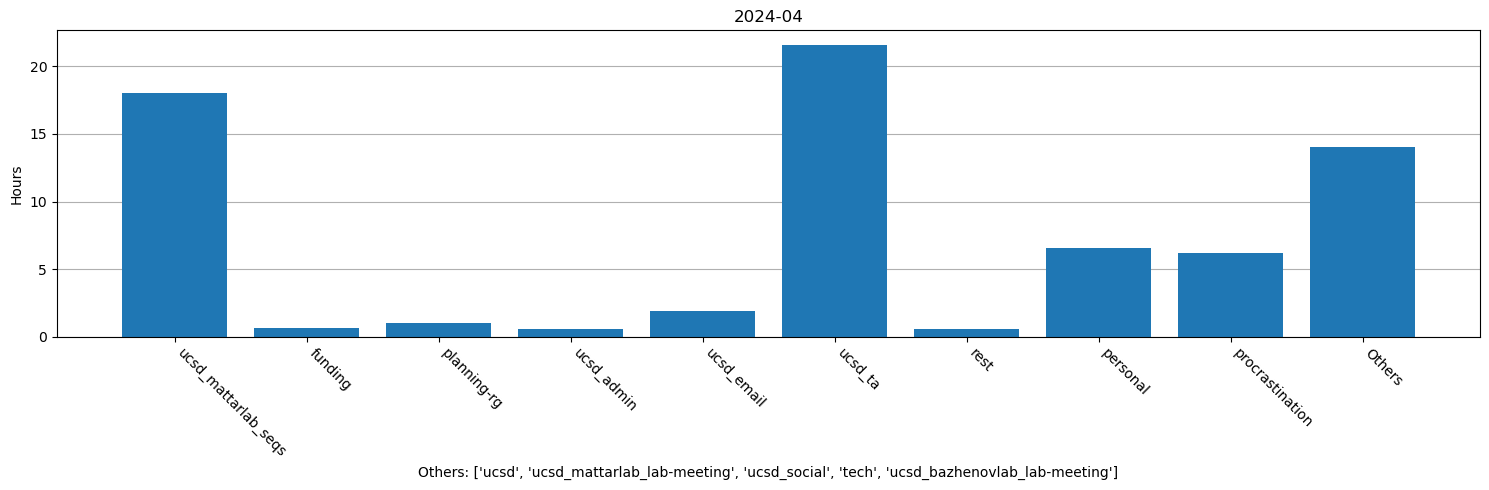

(2024, 5)


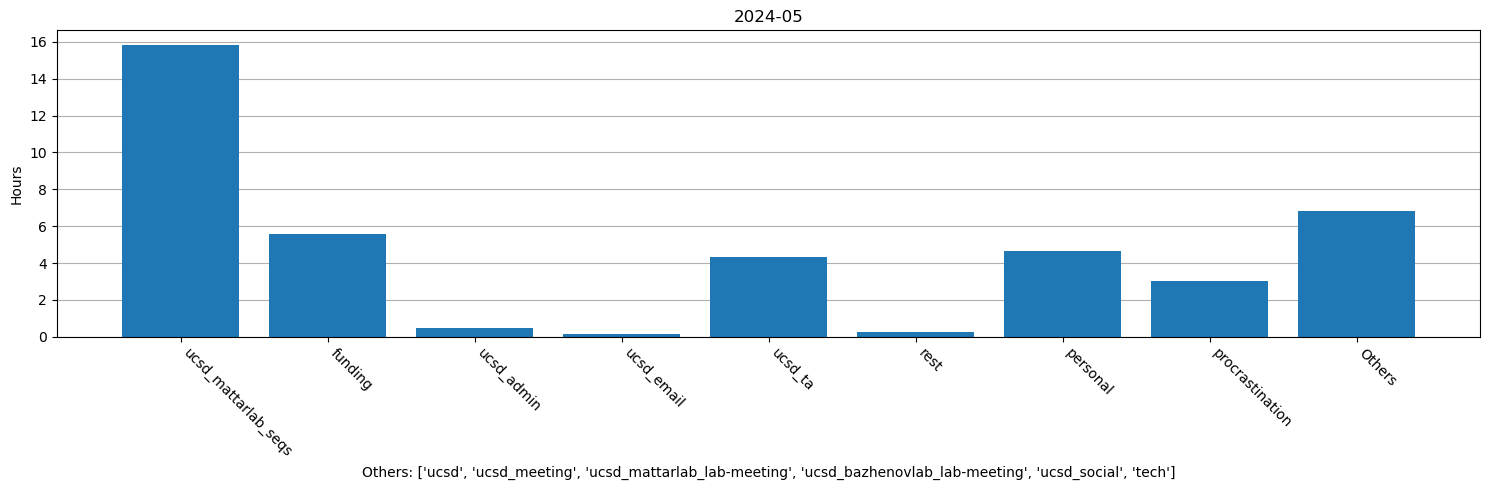

In [23]:
today = datetime.date.today()
n_months = 63  # starts in 2019-Mar
hours = []
month_labels = []
monthly_worked_hours_str = []
monthly_research_hours = []
monthly_ta_hours = []
monthly_study_hours = []
for m in range(n_months):
    curr_yr_mn = get_nth_prev_month(today.year, today.month, n_months - m - 1)
    print(curr_yr_mn)
    month_labels.append("%d-%02d" % curr_yr_mn)
    month_range = get_month_range(*curr_yr_mn)
    res = calc_worked_time_in_date_range(month_range)
    monthly_worked_hours_str.append(res[1])
    n_working_days = int(res[2]/8)
    
    # get amount of worked hours per category
    month_range_str = [day.strftime("%Y-%m-%d") for day in month_range]
    atts, durs_in_h = view.get_attributions_and_durations_from_range(month_range_str)
    all_tags, all_durs, others_labels = view.aggregate_att_hours(TAGS, atts, durs_in_h)
    if (n_months-m)<=30:
        view.plot_aggregate_att_hours(all_tags, all_durs, others_labels, "%d-%02d" % curr_yr_mn)
        show()
    hours_research = view.calc_research_hours(array(all_durs), array(all_tags))
    hours_ta = array(all_durs)[array(all_tags) == "ucsd_ta"].sum()
    hours_study = array(all_durs)[np.logical_or.reduce(array([array(all_tags) == study_tag 
                                                               for study_tag in STUDY_TAGS]))].sum()
    #TODO: get amount of time dedicated to "Others"
    monthly_research_hours.append(hours_research/n_working_days)
    monthly_ta_hours.append(hours_ta/n_working_days)
    monthly_study_hours.append(hours_study/n_working_days)

In [24]:
whs = [str_to_timedelta(worktime).seconds/3600 for worktime in monthly_worked_hours_str]
np.array(whs)
# month_labels

array([ 4.75      ,  3.46666667,  6.55      ,  9.23333333,  8.38333333,
        7.3       , 10.23333333, 11.06666667, 12.51666667,  8.63333333,
       10.45      ,  5.06666667,  2.78333333,  5.51666667,  6.73333333,
        4.53333333, 10.88333333,  3.81666667,  7.05      , 11.05      ,
       11.46666667,  9.53333333, 10.98333333, 11.73333333, 10.6       ,
       10.7       , 10.26666667,  9.38333333,  9.43333333,  6.        ,
        9.76666667,  6.61666667,  4.3       ,  4.3       ,  5.5       ,
        5.85      ,  4.18333333,  6.23333333,  7.36666667,  4.96666667,
        3.35      ,  2.91666667,  4.65      ,  6.2       ,  7.05      ,
        2.01666667,  6.03333333,  7.73333333,  4.25      ,  4.58333333,
        3.51666667,  0.95      ,  0.06666667,  0.28333333,  0.26666667,
        2.71666667,  3.25      ,  4.26666667,  6.63333333,  4.11666667,
        1.88333333,  3.75      ,  1.45      ])

In [58]:
# import pandas as pd
# wh = pd.read_csv("monthly-work-hours.csv",header=None)
# whs = [str_to_timedelta(worktime).seconds/3600 for worktime in wh[1]]
# wh

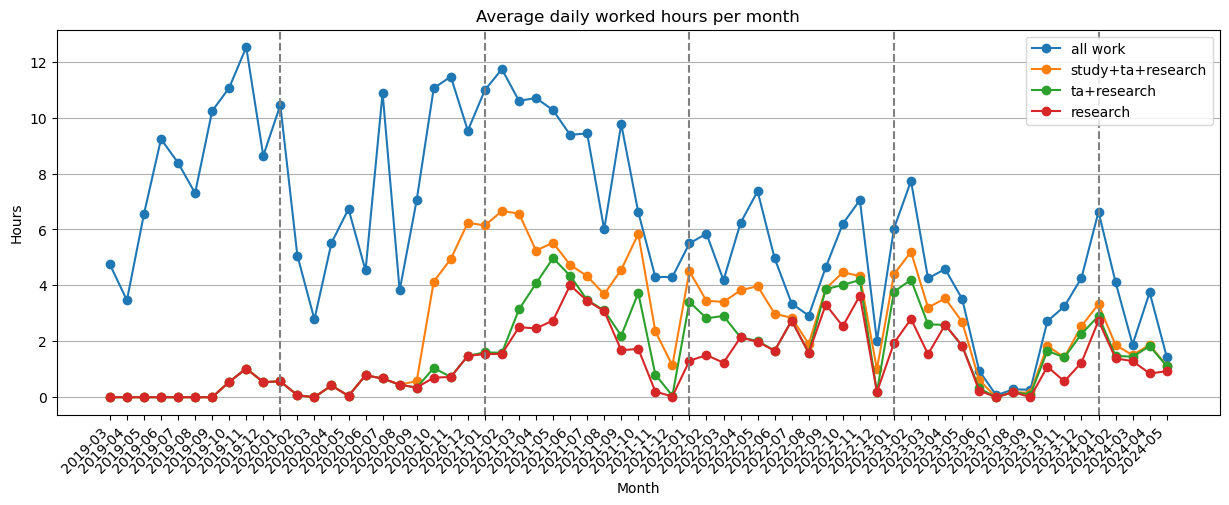

In [25]:
fig = figure(figsize=(15,5))
title("Average daily worked hours per month")
xticks(rotation=45, ha='right')
plot(month_labels, whs, "-o", label="all work")
plot(month_labels, array(monthly_study_hours)+array(monthly_ta_hours)+array(monthly_research_hours), "-o", label="study+ta+research")
plot(month_labels, array(monthly_ta_hours)+array(monthly_research_hours), "-o", label="ta+research")
plot(month_labels, monthly_research_hours, "-o", label="research")
ylabel("Hours")
xlabel("Month")
axvline(month_labels.index('2020-01'), ls='--', color='gray')  # TODO: make this dependent on how many months are plotted
axvline(month_labels.index('2021-01'), ls='--', color='gray')
axvline(month_labels.index('2022-01'), ls='--', color='gray')
axvline(month_labels.index('2023-01'), ls='--', color='gray')
axvline(month_labels.index('2024-01'), ls='--', color='gray')
legend()
grid(axis='y')

In [12]:
fig.savefig("daily-worked-hours-per-month.png")